# **Python para análise de dados(Pandas)**

## Importando bibliotecas e dados

In [1]:
#importando a biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, theme, element_text

In [2]:
#obtendo acesso aos dados no google drive
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#importando dados
df = pd.read_csv("/content/gdrive/My Drive/cursos/DIO/datasets/Gapminder.csv",error_bad_lines=False, sep=";")


##Analisando dados faltantes e eventuais inconsistências

In [4]:
#obtendo os nomes das colunas
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [5]:
#traduzindo os nomes das colunas
df.rename(columns={"country":"Pais", "continent":"Continente", "year":"Ano", "lifeExp":"Expectativa_de_vida", "pop":"Pop_Total", "gdpPercap":"PIB"}, inplace=True)

In [6]:
#obtendo os dados das cinco primeiras linhas
df.head()

,Pais,Continente,Ano,Expectativa_de_vida,Pop_Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
#obtendo os tipos dos dados
df.dtypes

Pais                    object
Continente              object
Ano                      int64
Expectativa_de_vida    float64
Pop_Total                int64
PIB                    float64
dtype: object

Como existe apenas o ano, não mudaremos o tipo de Ano para data

In [8]:
#consultando linhas com valores faltantes
df.isnull().sum()

Pais                     0
Continente             301
Ano                      0
Expectativa_de_vida      0
Pop_Total                0
PIB                      0
dtype: int64

In [9]:
#vimos aqui que alguns países não possui o continente
print(df[df["Continente"].isnull()])

         Pais Continente   Ano  Expectativa_de_vida  Pop_Total          PIB
60    Armenia        NaN  1992               68.663    3378331  1442.937796
61    Armenia        NaN  1997               70.377    3059000  1791.347190
62    Armenia        NaN  2002               71.403    3013818  2692.304039
63    Armenia        NaN  2007               71.965    2971650  4942.543911
64      Aruba        NaN  1972               70.941      59461  4939.758007
...       ...        ...   ...                  ...        ...          ...
3235  Vanuatu        NaN  1987               61.860     142207  3251.274545
3236  Vanuatu        NaN  1992               65.080     161399  3443.424460
3237  Vanuatu        NaN  1997               66.462     179428  3840.467248
3238  Vanuatu        NaN  2002               68.406     196178  3234.458141
3239  Vanuatu        NaN  2007               70.038     211971  3656.907161

[301 rows x 6 columns]


In [10]:
#vendo quais são os valores contidos em Continente
df["Continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

In [11]:
#podemos corrigir se for o caso
df.loc[df.Pais == 'Armenia', 'Continente'] = 'Asia'
print(df[df["Continente"].isnull()])

         Pais Continente   Ano  Expectativa_de_vida  Pop_Total           PIB
64      Aruba        NaN  1972               70.941      59461   4939.758007
65      Aruba        NaN  1977               71.830      59412   7390.359942
66      Aruba        NaN  1982               74.116      61569  10874.914950
67      Aruba        NaN  1987               74.494      65415  17674.338900
68      Aruba        NaN  1992               74.108      67174  25120.549610
...       ...        ...   ...                  ...        ...           ...
3235  Vanuatu        NaN  1987               61.860     142207   3251.274545
3236  Vanuatu        NaN  1992               65.080     161399   3443.424460
3237  Vanuatu        NaN  1997               66.462     179428   3840.467248
3238  Vanuatu        NaN  2002               68.406     196178   3234.458141
3239  Vanuatu        NaN  2007               70.038     211971   3656.907161

[297 rows x 6 columns]


In [12]:
#ou podemos retirar as linhas que contém dados faltantes
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Continente"], inplace=True)
df.isnull().sum()

Pais                   0
Continente             0
Ano                    0
Expectativa_de_vida    0
Pop_Total              0
PIB                    0
dtype: int64

In [13]:
## observando a fonte dos dados vemos que FSU significa "Former Soviet Union states"
## o que pode não fazer muito sentido, então, podemos retirar estes dados
df = df.drop(df[df["Continente"] == "FSU"].index)
df["Continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [14]:
#podemos confirmar que as linhas cujo país é Armenia tiveram Asia introduzida como continente
#e que as linhas cujo país é Aruba foram excluídas
df.iloc[60:70]

,Pais,Continente,Ano,Expectativa_de_vida,Pop_Total,PIB
60,Armenia,Asia,1992,68.663,3378331,1442.937796
61,Armenia,Asia,1997,70.377,3059000,1791.347190
62,Armenia,Asia,2002,71.403,3013818,2692.304039
63,Armenia,Asia,2007,71.965,2971650,4942.543911
128,Austria,Europe,1950,64.880,6935100,5733.098114
129,Austria,Europe,1951,65.260,6935451,6124.928282
130,Austria,Europe,1952,66.800,6927772,6137.076492
131,Austria,Europe,1953,67.290,6932483,6399.786948
132,Austria,Europe,1954,67.320,6940209,7045.971274
133,Austria,Europe,1955,67.600,6946885,7817.250888


##Analise sobre a Expectativa de Vida

In [15]:
#vamos fazer uma analise sobre a expectativa de vida dos ultimos dez anos de dados
filtro = (df['Ano'] >= 1996) & (df['Ano'] <= 2006)
df10 = df.loc[filtro]
df10.head()

,Pais,Continente,Ano,Expectativa_de_vida,Pop_Total,PIB
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
21,Albania,Europe,1997,72.950,3428038,3193.054604
22,Albania,Europe,2002,75.651,3508512,4604.211737
33,Algeria,Africa,1997,69.152,29072015,4797.295051


In [16]:
#podemos confirmar que temos dados de todos os continentes nos ultimos dez anos
print(df10.groupby("Continente")["Pais"].nunique())

Continente
Africa      51
Americas    25
Asia        42
Europe      35
Oceania      3
Name: Pais, dtype: int64


In [17]:
#podemos adicionar uma coluna com o calculo do PIB dividido por habitante
df['PIB_Percapita'] = 1000000*df["PIB"] / df["Pop_Total"]
df.head()

,Pais,Continente,Ano,Expectativa_de_vida,Pop_Total,PIB,PIB_Percapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,92.512108
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,88.827929
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,83.090856
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,72.473531
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,56.575815


In [18]:
#podemos ver a media da expectativa de vida dos últimos anos para cada continente
grouped_multiple = df10.groupby(['Continente', 'Ano']).agg({'Expectativa_de_vida': ['mean', 'min', 'max']})
grouped_multiple.columns = ['Expectativa_de_vida_mean', '_min', '_max']
df10 = grouped_multiple.groupby("Continente")["Expectativa_de_vida_mean"].mean() 
print(df10.head())

Continente
Africa      53.144235
Americas    76.122460
Asia        77.096671
Europe      77.023329
Oceania     76.101667
Name: Expectativa_de_vida_mean, dtype: float64


##Gráficos

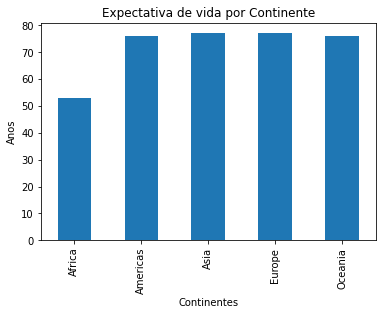

In [19]:
#podemos plotar um grafico de barras
df10.plot.bar(title="Expectativa de vida por Continente")
plt.xlabel("Continentes")
plt.ylabel("Anos");


In [20]:
#podemos salvar a imagem
plt.savefig("grafico Expectativa de vida.png")

<Figure size 432x288 with 0 Axes>

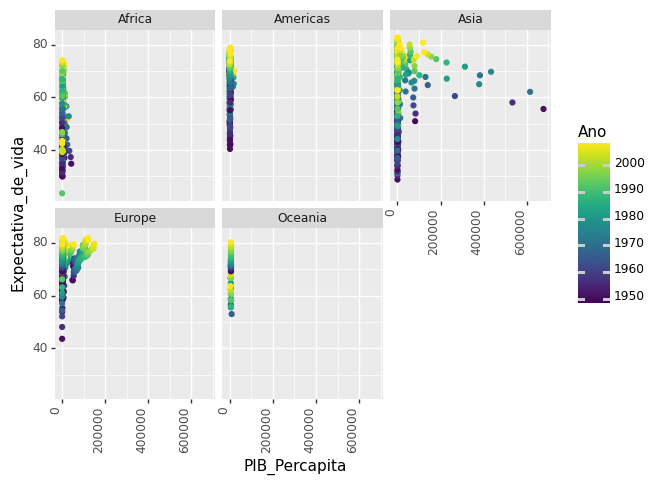

<ggplot: (8773830905901)>

In [21]:
#por fim, podemos fazer uma analise multidimensional 
ggplot(df, aes(x="PIB_Percapita", y="Expectativa_de_vida", color = "Ano")) + geom_point() + facet_wrap("Continente") + theme(axis_text_x = element_text(angle=90, hjust=1))